# Programming

## Titanic Survial Prediction

### Install Dataset

In [1]:
!gdown -q 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Show dataset

In [4]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col = "PassengerId"
)

In [ ]:
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
6,3,0,28.0,0,0,8.4583,2,0,0
7,1,0,54.0,0,0,51.8625,0,0,0
8,3,0,2.0,3,1,21.0750,0,3,0
9,3,1,27.0,0,2,11.1333,0,1,1


### Split Data and Label

In [5]:
datasetarr = df.to_numpy().astype(np.float64)
X, y = datasetarr[:,:-1], datasetarr[:,-1]

In [6]:
X[:10]

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         1.    ],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         2.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         1.    ],
       [ 3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,
         0.    ],
       [ 3.    ,  0.    , 28.    ,  0.    ,  0.    ,  8.4583,  2.    ,
         0.    ],
       [ 1.    ,  0.    , 54.    ,  0.    ,  0.    , 51.8625,  0.    ,
         0.    ],
       [ 3.    ,  0.    ,  2.    ,  3.    ,  1.    , 21.075 ,  0.    ,
         3.    ],
       [ 3.    ,  1.    , 27.    ,  0.    ,  2.    , 11.1333,  0.    ,
         1.    ],
       [ 2.    ,  1.    , 14.    ,  1.    ,  0.    , 30.0708,  1.    ,
         1.    ]])

In [ ]:
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

### Add bias term (Intercpet)

In [ ]:
intercept = np.ones((X.shape[0], 1))

X = np.concatenate((intercept, X), axis=1)

In [ ]:
X[:10]

array([[ 1.    ,  3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,
         0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,
         1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,
         0.    ,  2.    ],
       [ 1.    ,  1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,
         0.    ,  1.    ],
       [ 1.    ,  3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,
         0.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , 28.    ,  0.    ,  0.    ,  8.4583,
         2.    ,  0.    ],
       [ 1.    ,  1.    ,  0.    , 54.    ,  0.    ,  0.    , 51.8625,
         0.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    ,  2.    ,  3.    ,  1.    , 21.075 ,
         0.    ,  3.    ],
       [ 1.    ,  3.    ,  1.    , 27.    ,  0.    ,  2.    , 11.1333,
         0.    ,  1.    ],
       [ 1.    ,  2.    ,  1.    , 14.    ,  1.    ,  0.    , 30.0708,
         1.    ,  1.    ]])

### Split Train - Validation - Test set

In [7]:
VAL_SIZE = 0.2
TEST_SIZE = 0.125
RANDOM_STATE = 2
IS_SHUFFLE = True

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = VAL_SIZE,
    random_state = RANDOM_STATE,
    shuffle = IS_SHUFFLE
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    shuffle = IS_SHUFFLE
)

### Standarize Train - Valid - Test set

In [9]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

### Functionality

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def predict(X, theta):
    linear_predict = X.dot(theta)
    return sigmoid(linear_predict)

In [12]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

In [13]:
def compute_gradient(X, y, y_hat):
    return X.T.dot(y_hat - y) / y.size

In [14]:
def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

In [15]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    return (y_hat == y).mean()

### Initialize Hyper-Parameters

In [16]:
learning_rate = 0.01
epochs = 100
batch_size = 16

np.random.seed(RANDOM_STATE)
theta = np.random.uniform(size=X_train.shape[1])

### Train Logistic Model

In [17]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

In [18]:
for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_hat = predict(X_batch, theta)
        loss = compute_loss(y_hat, y_batch)
        gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, gradient, learning_rate)

        train_batch_losses.append(loss)
        train_batch_accs.append(compute_accuracy(X_batch, y_batch, theta))

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_batch_accs.append(compute_accuracy(X_val, y_val, theta))

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f"Epoch: {epoch + 1}/{epochs}", end="\t")
    print(f"Train Loss: {train_batch_loss:.4f}", end="\t")
    print(f"Val Loss: {val_batch_loss:.4f}", end="\t\n")

Epoch: 1/100	Train Loss: 0.8448	Val Loss: 0.7629	
Epoch: 2/100	Train Loss: 0.6949	Val Loss: 0.6687	
Epoch: 3/100	Train Loss: 0.6264	Val Loss: 0.6365	
Epoch: 4/100	Train Loss: 0.5890	Val Loss: 0.6228	
Epoch: 5/100	Train Loss: 0.5649	Val Loss: 0.6146	
Epoch: 6/100	Train Loss: 0.5472	Val Loss: 0.6080	
Epoch: 7/100	Train Loss: 0.5332	Val Loss: 0.6018	
Epoch: 8/100	Train Loss: 0.5216	Val Loss: 0.5959	
Epoch: 9/100	Train Loss: 0.5117	Val Loss: 0.5903	
Epoch: 10/100	Train Loss: 0.5032	Val Loss: 0.5851	
Epoch: 11/100	Train Loss: 0.4958	Val Loss: 0.5804	
Epoch: 12/100	Train Loss: 0.4893	Val Loss: 0.5761	
Epoch: 13/100	Train Loss: 0.4836	Val Loss: 0.5722	
Epoch: 14/100	Train Loss: 0.4786	Val Loss: 0.5688	
Epoch: 15/100	Train Loss: 0.4741	Val Loss: 0.5658	
Epoch: 16/100	Train Loss: 0.4701	Val Loss: 0.5631	
Epoch: 17/100	Train Loss: 0.4666	Val Loss: 0.5607	
Epoch: 18/100	Train Loss: 0.4634	Val Loss: 0.5586	
Epoch: 19/100	Train Loss: 0.4606	Val Loss: 0.5568	
Epoch: 20/100	Train Loss: 0.4580	Val Los

Text(0.5, 1.0, 'Validation Accuracy')

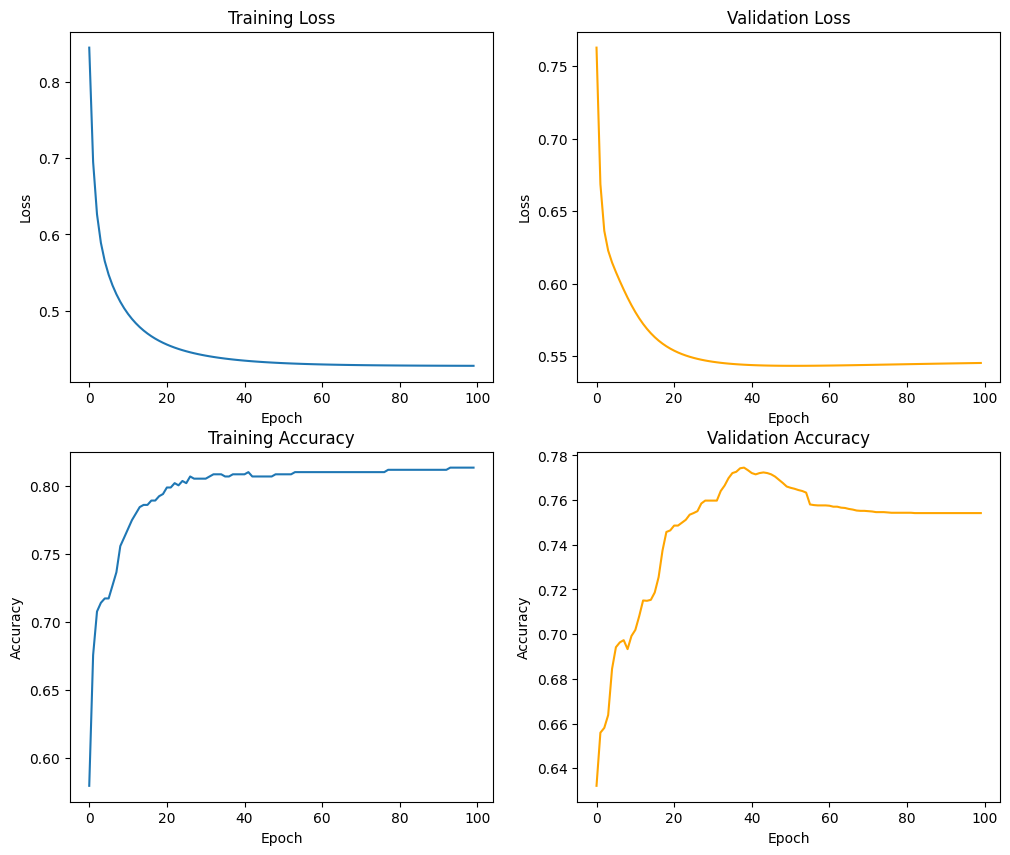

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epoch", ylabel="Loss")
ax[0, 0].set_title("Training Loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set(xlabel="Epoch", ylabel="Loss")
ax[0, 1].set_title("Validation Loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 0].set_title("Training Accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 1].set_title("Validation Accuracy")

### Evaluate Model

In [20]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on validation and test set:")
print(f"Validation Accuracy: {val_set_acc:.4f}")
print(f"Test Accuracy: {test_set_acc:.4f}")

Evaluation on validation and test set:
Validation Accuracy: 0.7542
Test Accuracy: 0.7753


## Twitter Sentiment Analysis

### Dataset Installation

In [22]:
!gdown -q 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

### Import libraries

In [23]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

### Read Dataset

In [25]:
dataset_path = "sentiment_analysis.csv"
df = pd.read_csv(dataset_path, index_col="id")

In [26]:
df.head(10)

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
6,1,iPhone software update fucked up my phone big ...
7,0,Happy for us .. #instapic #instadaily #us #son...
8,0,New Type C charger cable #UK http://www.ebay.c...
9,0,Bout to go shopping again listening to music #...


### Preprocessing

In [27]:
def text_normalize(text):
    text = re.sub(r"^RT[\s]+", "", text)
    text = re.sub(r"https?:\/\/.*[\r\n]*", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)

    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

#### Build Word Density *Appearance*

In [28]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)

    for idx, row in df.iterrows():
        tweet = row["tweet"]
        label = row["label"]


        tokens =  text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

#### Create feature vector

In [37]:
def get_feature(text, freqs):
    tokens = text_normalize(text)
    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token,0)]
        X[2] += freqs[(token,1)]

    return X

#### Extracing feature through all data


In [38]:
X = []
y = []

freqs = get_freqs(df)

for idx, row in df.iterrows():
    tweet = row["tweet"]
    label = row["label"]

    X.append(get_feature(tweet, freqs))
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

### Split train - validation - test set

In [39]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

### Normalizing Data

In [40]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

### Functionality

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat,1e-7,1-1e-7)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    linear_predict = X.dot(theta)
    return sigmoid(linear_predict)

def compute_gradient(X, y, y_hat):
    return X.T.dot(y_hat - y) / y.size

def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    return (y_hat == y).mean()

### Weights and Hyper-parameter initialization

In [42]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

### Model Trainning

In [43]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_hat = predict(X_batch, theta)
        loss = compute_loss(y_hat, y_batch)
        gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, gradient, learning_rate)

        train_batch_losses.append(loss)
        train_batch_accs.append(compute_accuracy(X_batch, y_batch, theta))

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_batch_accs.append(compute_accuracy(X_val, y_val, theta))

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f"Epoch: {epoch + 1}/{epochs}", end="\t")
    print(f"Train Loss: {train_batch_loss:.4f}", end="\t")
    print(f"Val Loss: {val_batch_loss:.4f}", end="\t\n")

Epoch: 1/200	Train Loss: 0.7067	Val Loss: 0.7044	
Epoch: 2/200	Train Loss: 0.6611	Val Loss: 0.6589	
Epoch: 3/200	Train Loss: 0.6239	Val Loss: 0.6218	
Epoch: 4/200	Train Loss: 0.5936	Val Loss: 0.5915	
Epoch: 5/200	Train Loss: 0.5686	Val Loss: 0.5665	
Epoch: 6/200	Train Loss: 0.5479	Val Loss: 0.5457	
Epoch: 7/200	Train Loss: 0.5307	Val Loss: 0.5285	
Epoch: 8/200	Train Loss: 0.5163	Val Loss: 0.5140	
Epoch: 9/200	Train Loss: 0.5041	Val Loss: 0.5018	
Epoch: 10/200	Train Loss: 0.4938	Val Loss: 0.4914	
Epoch: 11/200	Train Loss: 0.4850	Val Loss: 0.4826	
Epoch: 12/200	Train Loss: 0.4774	Val Loss: 0.4749	
Epoch: 13/200	Train Loss: 0.4709	Val Loss: 0.4683	
Epoch: 14/200	Train Loss: 0.4652	Val Loss: 0.4625	
Epoch: 15/200	Train Loss: 0.4601	Val Loss: 0.4575	
Epoch: 16/200	Train Loss: 0.4557	Val Loss: 0.4530	
Epoch: 17/200	Train Loss: 0.4518	Val Loss: 0.4490	
Epoch: 18/200	Train Loss: 0.4483	Val Loss: 0.4455	
Epoch: 19/200	Train Loss: 0.4452	Val Loss: 0.4423	
Epoch: 20/200	Train Loss: 0.4423	Val Los

### Evaluate Model

Text(0.5, 1.0, 'Validation Accuracy')

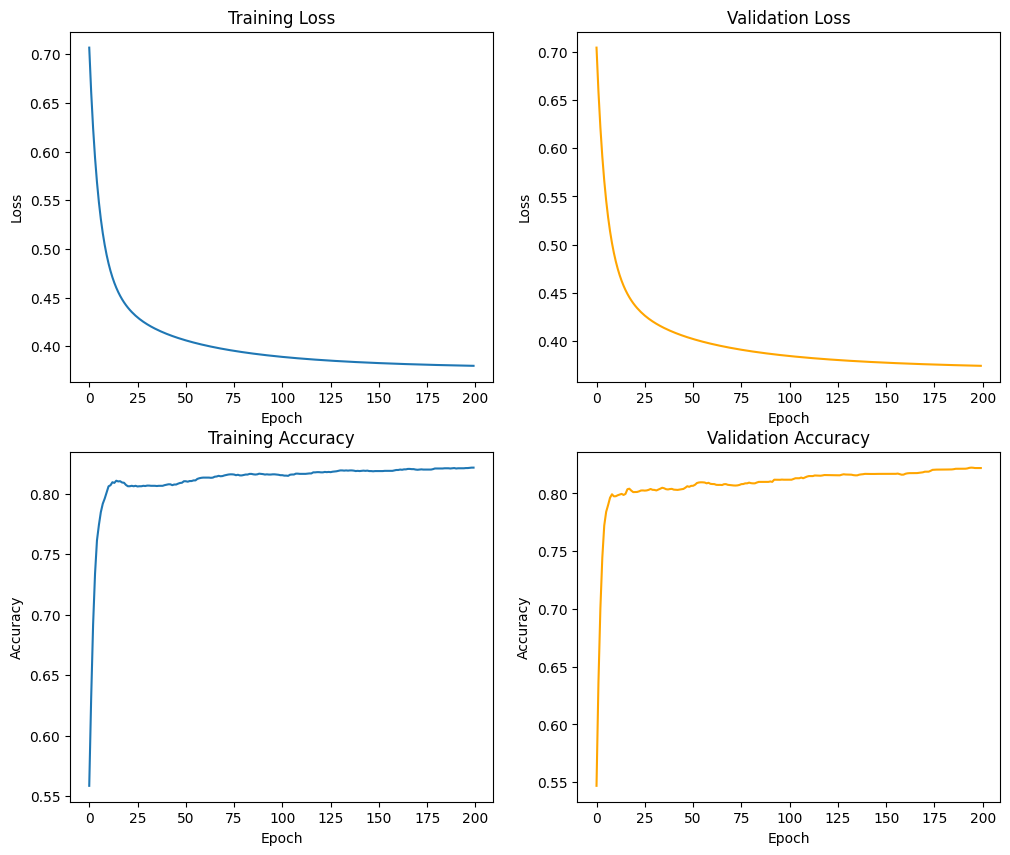

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epoch", ylabel="Loss")
ax[0, 0].set_title("Training Loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set(xlabel="Epoch", ylabel="Loss")
ax[0, 1].set_title("Validation Loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 0].set_title("Training Accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 1].set_title("Validation Accuracy")

In [45]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on validation and test set:")
print(f"Validation Accuracy: {val_set_acc:.4f}")
print(f"Test Accuracy: {test_set_acc:.4f}")

Evaluation on validation and test set:
Validation Accuracy: 0.8220
Test Accuracy: 0.8434


# Question

1. (a)
2. (a)
3. (b)
4. (c)
5. (b)
6. (b)
7. (a)
8. (b)
9. (b)
10. (a)
11. (a)
12. (d)
13. (c)
14. (a)
15. (a)
16. (c)
17. (d)
18. (a)